In [37]:
import pandas as pd

# Загрузка данных
train_data = pd.read_csv('train.csv')

# Вывод первых строк данных для ознакомления
print(train_data.head())

       A    B  C      D      E      F  target
0 -1.279  III  2  0.592  0.142  2.513   41.78
1 -1.922   II  5  0.213  2.711 -3.561   70.60
2 -0.147   II  4  0.455  2.087  0.128   36.01
3  0.900   II  2  0.359  0.699 -1.270   28.13
4 -0.319    I  5  0.569  0.241  0.302   55.61


In [38]:
train_data.describe()

,A,C,D,E,F,target
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.030939,3.020000,0.394548,1.039453,0.434412,42.165775
std,1.153392,1.746686,0.297184,1.062765,1.362226,13.294639
min,-1.988000,0.000000,0.000000,0.001000,-5.263000,11.360000
25%,-0.905750,2.000000,0.154000,0.294750,-0.265500,32.680000
50%,-0.014500,3.000000,0.338000,0.713000,0.425000,39.700000
75%,1.052000,4.000000,0.577250,1.401500,1.048250,49.087500
max,1.992000,10.000000,1.413000,7.316000,6.935000,91.780000


In [39]:
# Переделаем колонку B: пусть теперь I - 1, II - 2, III - 3
# Создание словаря для замены
replace_dict = {'I': 1, 'II': 2, 'III': 3}
# Замена значений в колонке 'B'
train_data['B'] = train_data['B'].map(replace_dict)

In [40]:

# Проверка результата
sorted_data_desc = train_data.sort_values(by='target', ascending=False)

# Вывод первых строк отсортированных данных
sorted_data_desc.head(100)

,A,B,C,D,E,F,target
248,-0.864,3,7,0.350,3.192,1.365,91.78
399,-1.852,1,4,0.923,2.071,-2.545,90.93
107,-1.657,3,5,0.052,4.186,1.711,89.79
6,-1.949,2,5,0.128,5.059,-0.133,88.33
466,1.663,3,4,0.378,2.904,2.004,88.31
...,...,...,...,...,...,...,...
319,0.840,1,1,0.152,0.417,0.377,57.37
149,1.718,2,1,0.806,2.674,1.599,57.19
255,0.966,3,1,0.163,0.811,5.632,57.11
24,-1.553,3,7,0.539,0.556,-0.773,57.08


**Видим что хорошо коррелированы E и target**

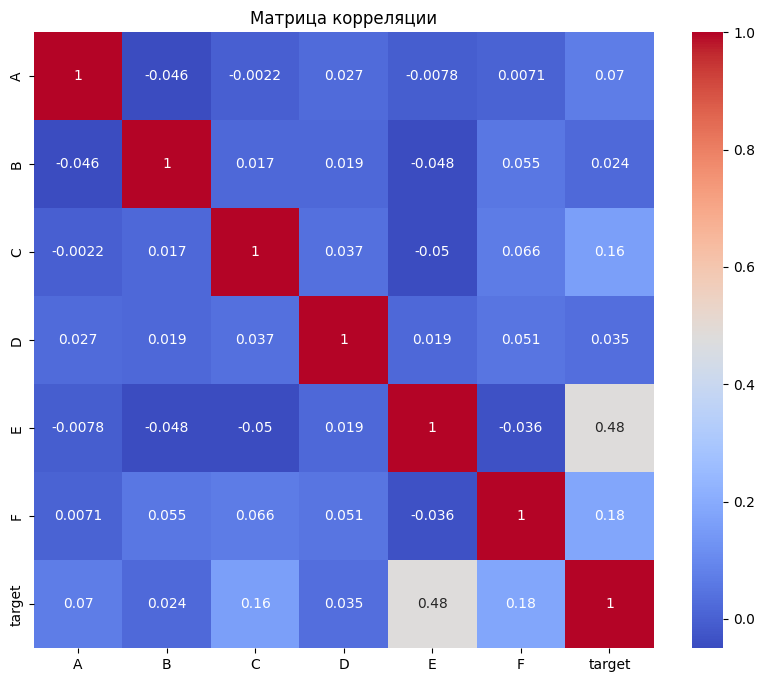

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение матрицы корреляции
corr_matrix = train_data.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

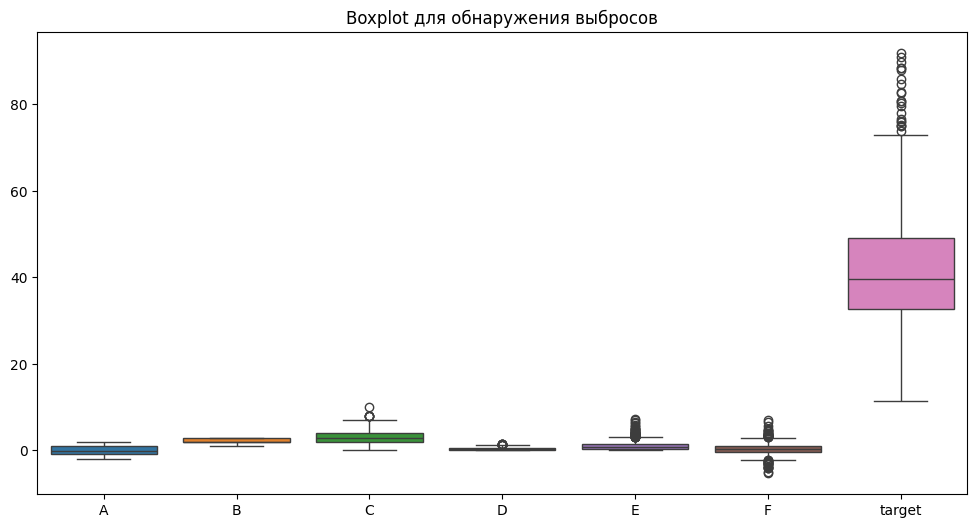

In [42]:
# Визуализация выбросов с помощью boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data)
plt.title('Boxplot для обнаружения выбросов')
plt.show()

**Используем нормировку параметров**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
X = train_data.drop('target', axis=1)
y = train_data['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Используем модель линейной регрессии**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели с помощью RMSE
rmse = mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse}')

RMSE: 130.19078963970458


Важность признаков:
D   -0.001040
B    0.390363
A    0.983651
F    2.230072
C    2.477592
E    6.925693
dtype: float64


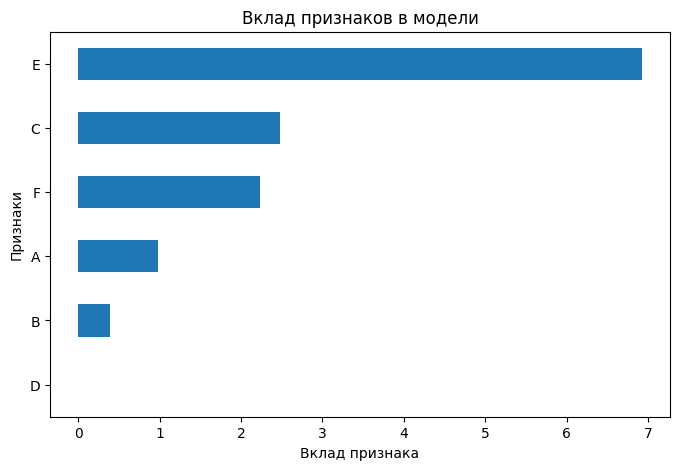

In [45]:
# Анализ важности признаков
feature_importance = pd.Series(model.coef_, index=train_data.columns[:-1]).sort_values(ascending=True)
print("Важность признаков:")
print(feature_importance)

plt.figure(figsize=(8, 5))
feature_importance.plot(kind='barh')
plt.title("Вклад признаков в модели")
plt.xlabel("Вклад признака")
plt.ylabel("Признаки")
plt.show()

**Попробуем линейную регрессию но с добавлением константы**

In [46]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)


In [12]:
# Строим регрессионную модель
model = sm.OLS(y_train, X_train_sm).fit()
y_pred = model.predict(X_test_sm)

In [13]:
# Коэффициент детерминации
r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R2): {r2:.2f}")

Коэффициент детерминации (R2): 0.22


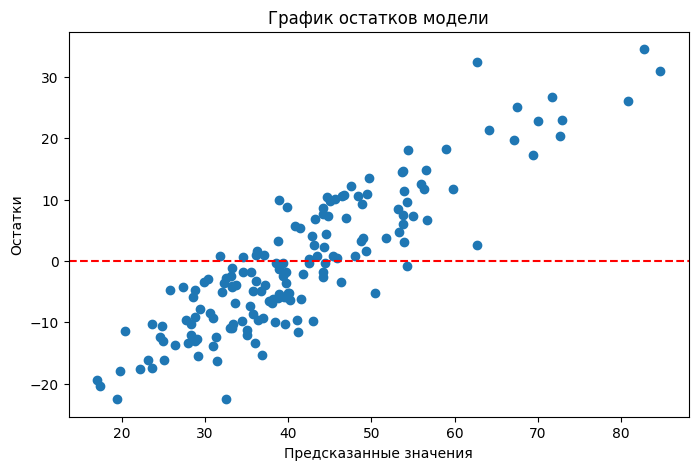

In [14]:
# Построение графика остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков модели")
plt.show()

**Попробуем Lasso и Ridge регрессию**

In [16]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Lasso регрессия
lasso = Lasso(alpha=0.01)  # alpha — параметр регуляризации
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso RMSE: {rmse_lasso}')

# Ridge регрессия
ridge = Ridge(alpha=0.1)  # alpha — параметр регуляризации
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge RMSE: {rmse_ridge}')

Lasso RMSE: 130.2112498071135
Ridge RMSE: 130.19108219004858


**Лог-линейная регрессия**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import fetch_california_housing

In [18]:
X_train_log, X_test_log = X_train_scaled, X_test_scaled

In [19]:
# Логарифмическое преобразование признаков
X_train_log = np.log1p(X_train_log)
X_test_log = np.log1p(X_test_log)

<ipython-input-19-4812453e0fc1>:2: RuntimeWarning: invalid value encountered in log1p
  X_train_log = np.log1p(X_train_log)
<ipython-input-19-4812453e0fc1>:3: RuntimeWarning: invalid value encountered in log1p
  X_test_log = np.log1p(X_test_log)


In [20]:
X_train

,A,B,C,D,E,F
264,1.439,2,3,0.095,0.002,-0.798
615,1.167,2,3,1.176,0.849,0.775
329,-0.424,3,1,0.269,3.083,-0.953
342,0.143,1,1,0.410,0.608,-0.951
394,0.503,3,2,0.281,1.295,-0.093
...,...,...,...,...,...,...
71,0.953,2,3,0.013,0.180,0.131
106,-0.796,2,3,0.436,0.885,0.542
270,1.021,2,1,0.162,2.280,-0.561
435,-1.900,2,2,0.345,0.043,0.275


In [21]:
# Обучение моделей
# 6. Добавляем единичный столбец для сдвига
X_train_log_sm = sm.add_constant(X_train_log)
X_test_log_sm = sm.add_constant(X_test_log)

# 7. Строим две модели линейной регрессии
model_log = sm.OLS(y_train, X_train_log_sm).fit()

MissingDataError: exog contains inf or nans

In [22]:
# Предсказания
y_pred_log = model_log.predict(X_test_log_sm)

NameError: name 'model_log' is not defined

**Лог-линейная регрессия не получилась, поскольку у меня отрицательные параметры <-1**

**Попробую добавить нелинейность 3ого порядка в признаках.**

In [23]:
from sklearn.preprocessing import PolynomialFeatures


# Создание полиномиальных признаков (степень 2)
poly = PolynomialFeatures(degree=3, include_bias=False)  # include_bias=False исключает столбец с единицами
X_train_poly = poly.fit_transform(X_train)  # Преобразуем обучающие данные
X_test_poly = poly.transform(X_test)        # Преобразуем тестовые данные

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание на тестовой выборке
y_pred_poly = model.predict(X_test_poly)

# Оценка модели с помощью RMSE
rmse = mean_squared_error(y_test, y_pred_poly)
print(f'RMSE с полиномиальными признаками: {rmse}')

RMSE с полиномиальными признаками: 10.170771566459232


**То есть это моя лучшая модель**

**Сделаю теперь решение случайным лесом**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [25]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR

import time
import matplotlib.pyplot as plt

In [26]:
# Сделаю одно дерево:

trees = [DecisionTreeRegressor(random_state=i) for i in (1, 2, 3)]
trees = list(map(lambda x: x.fit(X_train_scaled, y_train), trees.copy()))

trees_pred = list(map(lambda x: x.predict(X_test_scaled), trees.copy()))
forest_pred = np.sum(trees_pred, axis=0) / len(trees_pred)

for i in (1, 2, 3):
  print(f"RMSE for {i} tree: {mean_squared_error(trees_pred[i - 1], y_test)}")

print(f"RMSE for average prediction: {mean_squared_error(forest_pred, y_test)}")

RMSE for 1 tree: 65.57659437500001
RMSE for 2 tree: 62.050901875
RMSE for 3 tree: 64.88656999999999
RMSE for average prediction: 62.77126402777778


In [27]:
# Создание модели случайного леса
rf_model = RandomForestRegressor(
    n_estimators=100,  # Количество деревьев
    max_depth=None,    # Максимальная глубина дерева (None — без ограничений)
    min_samples_split=2,  # Минимальное количество образцов для разделения узла
    min_samples_leaf=1,   # Минимальное количество образцов в листе
    random_state=42       # Для воспроизводимости
)

# Обучение модели
rf_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rf_model.predict(X_test)

# Оценка модели с помощью RMSE
rmse = mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse}')


RMSE: 34.97300929806252


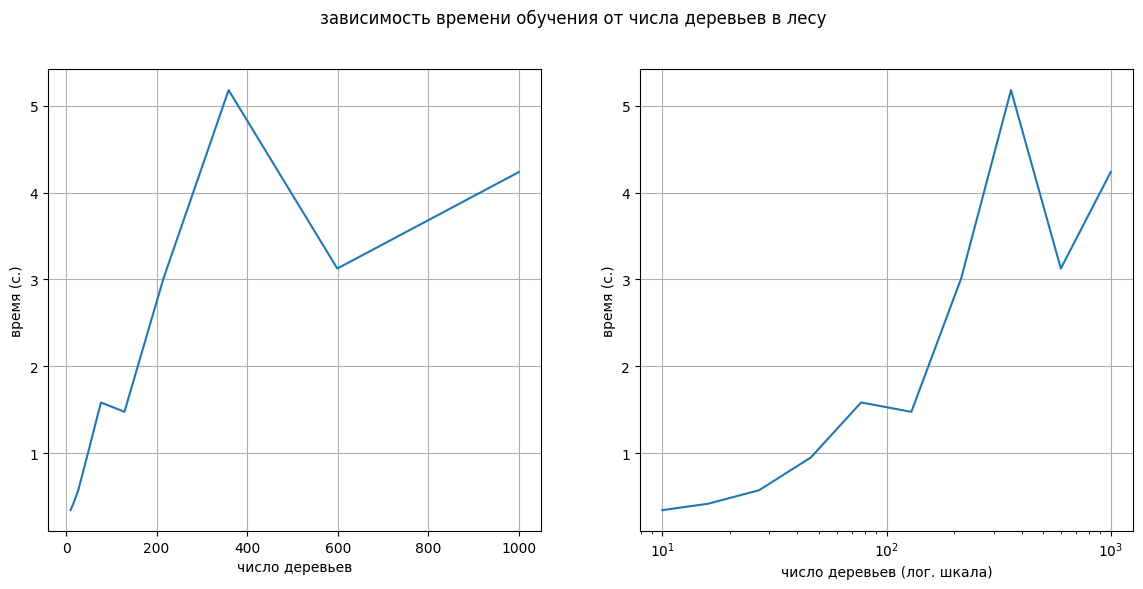

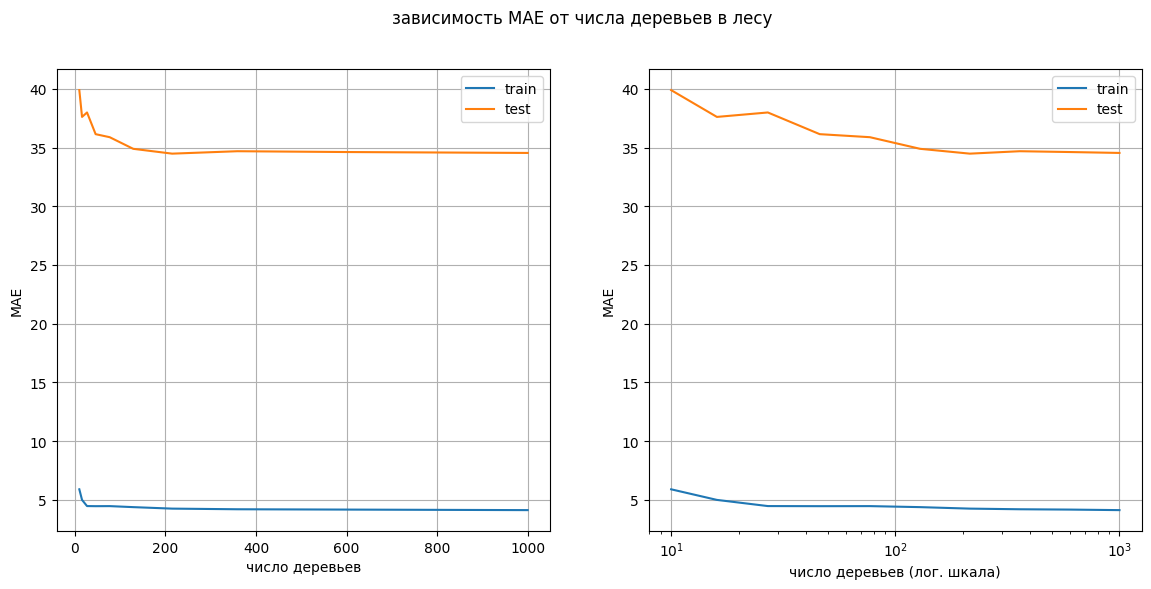

In [28]:
#Your code here:
time_results = []
rmse_results = []

trees_n = list(map(lambda x: int(np.floor(x)), np.logspace(1, 3, num=10)))

for est_num in trees_n:
  rfr = RandomForestRegressor(n_estimators=est_num, random_state=42)

  start = time.time()
  rfr.fit(X_train_scaled, y_train)
  end = time.time()
  time_results.append(end - start)
  rmse_results.append((mean_squared_error(y_train, rfr.predict(X_train_scaled)), mean_squared_error(y_test, rfr.predict(X_test_scaled))))
  plt.rcParams["figure.figsize"] = (14,6)

plt.subplot(1, 2, 1)
plt.plot(trees_n, time_results)
plt.suptitle("зависимость времени обучения от числа деревьев в лесу")
plt.xlabel("число деревьев")
plt.ylabel("время (с.)")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(trees_n, time_results)
plt.xscale('log')
plt.xlabel("число деревьев (лог. шкала)")
plt.ylabel("время (с.)")
plt.grid()

plt.show()

plt.subplot(1, 2, 1)
plt.plot(trees_n, rmse_results, label=("train", "test"))
plt.suptitle("зависимость MAE от числа деревьев в лесу")
plt.xlabel("число деревьев")
plt.ylabel("MAE")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(trees_n, rmse_results, label=("train", "test"))
plt.suptitle("зависимость MAE от числа деревьев в лесу")
plt.xlabel("число деревьев (лог. шкала)")
plt.xscale('log')
plt.ylabel("MAE")
plt.legend()
plt.grid()

plt.show()

**По итогу, использую модель с полиномиальными коэффициентами 3-его порядка**

In [47]:
from sklearn.preprocessing import PolynomialFeatures



# Создание полиномиальных признаков (степень 2)
poly = PolynomialFeatures(degree=2, include_bias=False)  # include_bias=False исключает столбец с единицами
X_train_poly = poly.fit_transform(X_train_scaled)  # Преобразуем обучающие данные
X_test_poly = poly.transform(X_test_scaled)        # Преобразуем тестовые данные

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание на тестовой выборке
y_pred_poly = model.predict(X_test_poly)

# Оценка модели с помощью RMSE
rmse = mean_squared_error(y_test, y_pred_poly)
print(f'RMSE с полиномиальными признаками: {rmse}')

RMSE с полиномиальными признаками: 12.16918081023967


**Проверка через leave-one-out**

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных
X = train_data.drop('target', axis=1)
y = train_data['target']

# Инициализация LOO
loo = LeaveOneOut()

# Список для хранения ошибок
rmse_scores = []

# Кросс-валидация LOO
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание
    y_pred = model.predict(X_test)

    # Вычисление RMSE для текущего тестового наблюдения
    rmse = mean_squared_error(y_test, y_pred)
    rmse_scores.append(rmse)

# Средний RMSE по всем итерациям LOO
mean_rmse = np.mean(rmse_scores)
print(f'Средний RMSE с Leave-One-Out: {mean_rmse}')

Средний RMSE с Leave-One-Out: 124.70259020363727


In [49]:
feature_importance = (model.coef_)

# Выводим топ-10 самых важных признаков
important_features = np.argsort(feature_importance)[::-1]  # Сортировка по убыванию
# for i in important_features[:10]:
#     print(f"Feature {i}: Importance {feature_importance[i]}")
feature_names = poly.get_feature_names_out()
for i in important_features[:]:
    print(f"{feature_names[i]}: Importance {feature_importance[i]}")


x4: Importance 6.230850216431595
x5: Importance 1.7987593916694964
x2: Importance 1.3152408212229427
x1: Importance 0.8922021204095629
x0: Importance 0.8317940077970759
x3: Importance 0.4133998541105298


In [50]:

test_data = pd.read_csv('test.csv')
replace_dict = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
# Замена значений в колонке 'B'
test_data['B'] = test_data['B'].map(replace_dict)
test_data.describe()

,A,B,C,D,E,F
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.213957,2.307500,4.935000,0.580122,2.840332,-0.408582
std,2.518653,0.812153,2.293234,0.439288,3.054849,2.847507
min,-2.999000,1.000000,0.000000,0.000000,0.001000,-12.631000
25%,-2.553500,2.000000,3.000000,0.232000,0.703750,-1.862250
50%,-2.093000,2.000000,5.000000,0.473500,1.796500,-0.441500
75%,2.453000,3.000000,6.000000,0.848250,3.795500,1.144000
max,2.993000,4.000000,12.000000,2.121000,21.146000,10.914000


In [51]:
# Загрузка тестовых данных
test_data = pd.read_csv('test.csv')

# Создание полиномиальных признаков (степень 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# Обучение модели линейной регрессии на полиномиальных признаках
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Загрузка тестовых данных
test_data = pd.read_csv('test.csv')

# Переделаем колонку B: пусть теперь I - 1, II - 2, III - 3
# Создание словаря для замены
replace_dict = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
# Замена значений в колонке 'B'
test_data['B'] = test_data['B'].map(replace_dict)

# Применение полиномиальных признаков к тестовым данным
X_test_poly = poly.transform(test_data)

# Предсказание целевой переменной для тестовых данных
test_predictions = model.predict(X_test_poly)

original_test_data = pd.read_csv('test.csv')
# Исходная
solution = original_test_data.copy()
solution['target'] = test_predictions

# Сохранение предсказаний в файл solution.csv
solution.to_csv('solution.csv', index=False)

print("Предсказания сохранены в файл solution.csv")


Предсказания сохранены в файл solution.csv


In [52]:
train_data.describe()

,A,B,C,D,E,F,target
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.030939,2.29375,3.020000,0.394548,1.039453,0.434412,42.165775
std,1.153392,0.62084,1.746686,0.297184,1.062765,1.362226,13.294639
min,-1.988000,1.00000,0.000000,0.000000,0.001000,-5.263000,11.360000
25%,-0.905750,2.00000,2.000000,0.154000,0.294750,-0.265500,32.680000
50%,-0.014500,2.00000,3.000000,0.338000,0.713000,0.425000,39.700000
75%,1.052000,3.00000,4.000000,0.577250,1.401500,1.048250,49.087500
max,1.992000,3.00000,10.000000,1.413000,7.316000,6.935000,91.780000


In [53]:
solution.describe()

,A,C,D,E,F,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.213957,4.935000,0.580122,2.840332,-0.408582,93.164856
std,2.518653,2.293234,0.439288,3.054849,2.847507,45.183627
min,-2.999000,0.000000,0.000000,0.001000,-12.631000,1.382081
25%,-2.553500,3.000000,0.232000,0.703750,-1.862250,65.200183
50%,-2.093000,5.000000,0.473500,1.796500,-0.441500,82.372711
75%,2.453000,6.000000,0.848250,3.795500,1.144000,108.539846
max,2.993000,12.000000,2.121000,21.146000,10.914000,398.535995
